In [1]:
# Importing packages
import matplotlib
import matplotlib.pyplot as plt  
import sys, os
import pandas as pd, numpy as np 
import time
from tqdm import tqdm
%matplotlib inline

# Setting plot preferences
matplotlib.rcParams['figure.figsize']  = (20.0, 10.0)
matplotlib.rcParams['axes.grid']       = False
matplotlib.rcParams['font.size']       = 15
matplotlib.rcParams['axes.labelsize']  = 0.9*plt.rcParams['font.size']
matplotlib.rcParams['axes.titlesize']  = 1.2*plt.rcParams['font.size']
matplotlib.rcParams['legend.fontsize'] = plt.rcParams['font.size']
matplotlib.rcParams['xtick.labelsize'] = 0.8*plt.rcParams['font.size']
matplotlib.rcParams['ytick.labelsize'] = 0.8*plt.rcParams['font.size']
matplotlib.rcParams['scatter.marker']  = 'o'
matplotlib.rcParams['axes.titlepad']   = 20 
matplotlib.rcParams['xtick.major.pad']='8'
matplotlib.rcParams['ytick.major.pad']='8'

In [2]:
mypath                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_2/Results/2D"
myfolder                = "2D/"


def read_files(path, folder):  
    lambda_ = []
    N_test = []
    rho = []
    
    for filename in os.listdir(path):
        with open(folder + filename, 'r') as infile:
            N_test.append(int(filename.split("_")[3]))
    
    N_max = np.max(np.unique(N_test))
    
    N = []
        
    for filename in os.listdir(path):
        temp = []
        with open(folder + filename, 'r') as infile:
            lines = infile.readlines()[1:]
            for line in lines:
                line = line.split()
                temp.append(float(line[2]))
            s = filename.split("_")
            N.append(int(s[3]))
            rho.append(int(s[5].split(".")[0]))
        temp = np.array(temp)
        addition = np.full(N_max - len(temp), np.NaN)
        temp2 = np.concatenate([temp, addition])
        lambda_.append(temp2)
    temp2 = np.vstack(temp2)
    df = pd.DataFrame({"N": N, "rho": rho, "lambda": lambda_})
    return df

Data = read_files(mypath, myfolder)

In [3]:
N_100 = Data[Data["N"] == 100]
N_100 = N_100.sort_values(by ='rho' )


def relative_error(arr):
    analytical = np.array([3,7,11,15])
    return np.log10(abs((arr-analytical))/analytical)


/home/oline/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


'plt.figure(figsize = (20,10))\nfor i in range(len(N_100)-1):\n    s = N_100["lambda"].iloc[i+3][0:4]\n    err = np.mean(abs(np.exp(s)))\n    fsize = 30\n    plt.plot(i+3, err, \'-o\', label = N_100["rho"].iloc[i])\n    plt.xlabel("Eigenvalue $\\lambda_i$", fontsize = fsize)\n    plt.ylabel("$\\epsilon_{rel} = log10(\\dfrac{\\lambda_i-\\lambda_{analytical}}{\\lambda_{analytical}})$", fontsize = fsize)\n    plt.title("Relative error by variations of rho\nN=100", fontsize = fsize)\n   # plt.xticks(N_100["rho"], fontsize = fsize)\n    plt.yticks(fontsize = fsize)\n   # plt.ylim([-10,20])\nplt.legend(loc = \'upper right\', fontsize = 20)\n'

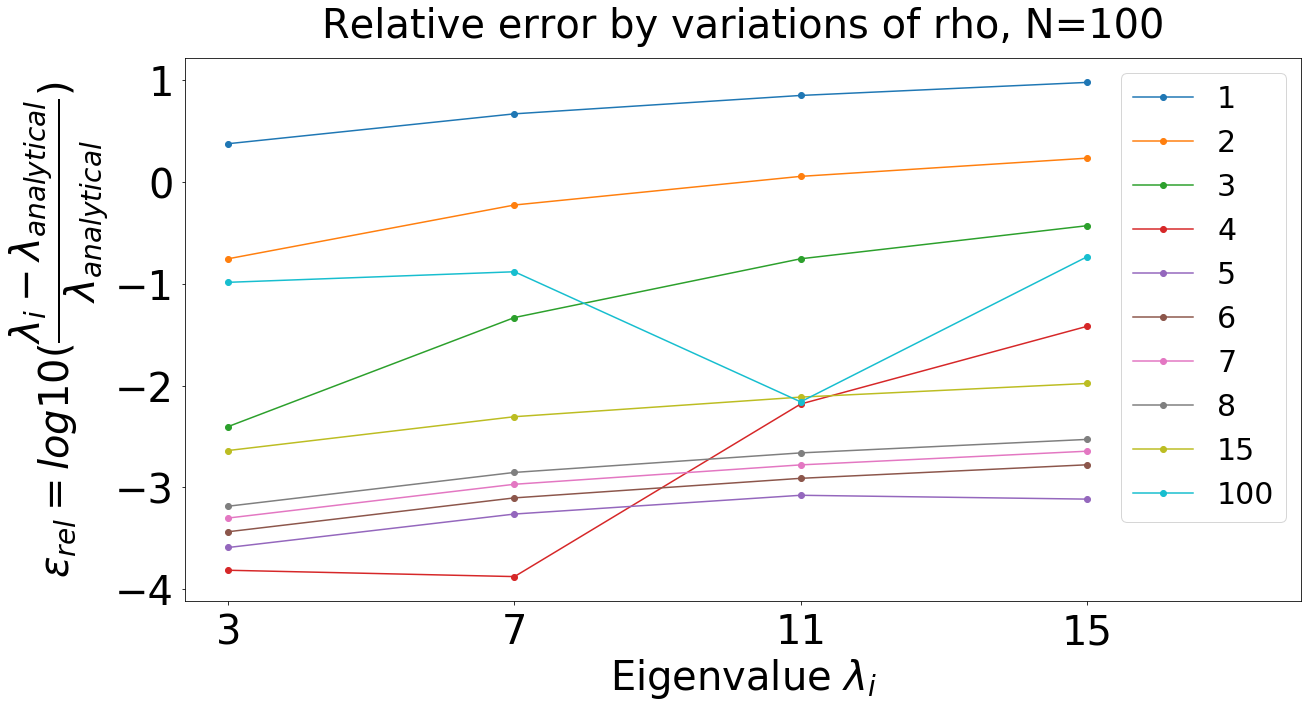

In [18]:
plt.figure(figsize = (20,10))


for i in range(len(N_100)):
    s = N_100["lambda"].iloc[i][0:4]
    err = relative_error(s)
    analytical = np.array([3,7,11,15])
    fsize = 40
    plt.plot(analytical,err, '-o', label = N_100["rho"].iloc[i])
    plt.xlabel("Eigenvalue $\lambda_i$", fontsize = fsize)
    plt.ylabel("$\epsilon_{rel} = log10(\dfrac{\lambda_i-\lambda_{analytical}}{\lambda_{analytical}})$", fontsize = fsize)
    plt.title("Relative error by variations of rho, N=100", fontsize = fsize)
    plt.xticks(analytical, fontsize = fsize)
    plt.yticks(fontsize = fsize)
    plt.xlim(xmax = 18)
plt.legend(loc = 'upper right', fontsize = fsize-10)
plt.savefig('N_100_relative_error.png')

"""plt.figure(figsize = (20,10))
for i in range(len(N_100)-1):
    s = N_100["lambda"].iloc[i+3][0:4]
    err = np.mean(abs(np.exp(s)))
    fsize = 30
    plt.plot(i+3, err, '-o', label = N_100["rho"].iloc[i])
    plt.xlabel("Eigenvalue $\lambda_i$", fontsize = fsize)
    plt.ylabel("$\epsilon_{rel} = log10(\dfrac{\lambda_i-\lambda_{analytical}}{\lambda_{analytical}})$", fontsize = fsize)
    plt.title("Relative error by variations of rho\nN=100", fontsize = fsize)
   # plt.xticks(N_100["rho"], fontsize = fsize)
    plt.yticks(fontsize = fsize)
   # plt.ylim([-10,20])
plt.legend(loc = 'upper right', fontsize = 20)
"""



[0.37316956 0.65647467 0.82104462 0.92702457]
[-0.76906596 -0.25392209  0.00785636  0.16019232]
[-2.42481216 -1.59862408 -0.91976719 -0.60308033]
[-1.85459639 -1.52207295 -1.36141999 -1.34402964]
[-1.65646012 -1.3133382  -1.10765239 -0.95739824]
[-1.49295413 -1.14293471 -0.92674501 -0.76639478]
[-1.35258443 -0.99308797 -0.77633418 -0.68561306]
[-1.22880461 -0.86763509 -0.72017135 -0.77161675]
[-1.41083261 -0.65926985 -0.20760831  0.02346098]
[1.42416702 1.6649145  1.82360818 1.94029729]


/home/oline/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


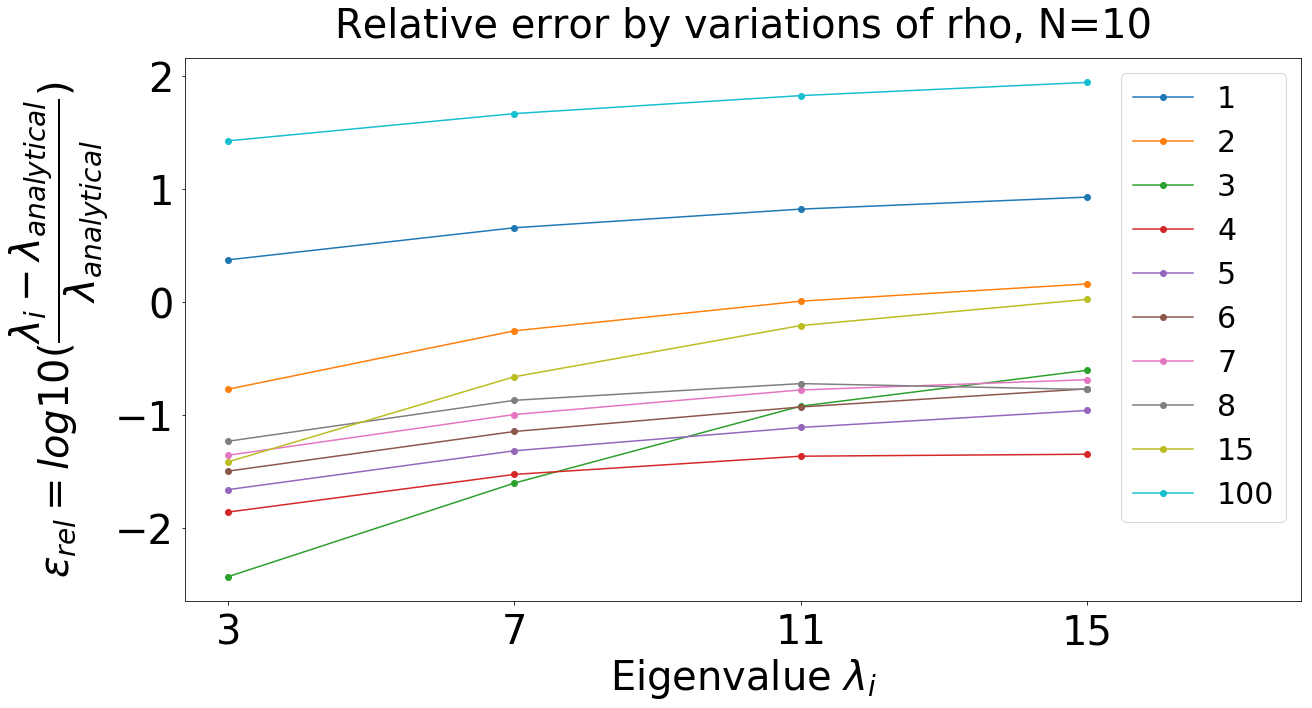

In [19]:
N_10 = Data[Data["N"] == 10]
N_10 = N_10.sort_values(by ='rho' )
plt.figure(figsize = (20,10))


for i in range(len(N_10)):
    s = N_10["lambda"].iloc[i][0:4]
    err = relative_error(s)
    print(err)
    analytical = np.array([3,7,11,15])
    fsize = 40
     
    plt.plot(analytical,err, '-o', label = N_10["rho"].iloc[i])
    plt.xlabel("Eigenvalue $\lambda_i$", fontsize = fsize)
    plt.ylabel("$\epsilon_{rel} = log10(\dfrac{\lambda_i-\lambda_{analytical}}{\lambda_{analytical}})$", fontsize = fsize)
    plt.title("Relative error by variations of rho, N=10", fontsize = fsize)
    plt.xticks(analytical, fontsize = fsize)
    plt.xlim(xmax = 18)
    plt.yticks(fontsize = fsize)
plt.legend(loc = 'upper right', fontsize = fsize-10)
plt.savefig('N_10_relative_error.png')

[0.37716049 0.67042611 0.85083553 0.97873426]
[-0.75351783 -0.22571249  0.05542351  0.23390945]
[-2.41228903 -1.33345528 -0.75549797 -0.43092274]
[-3.49485002 -3.64370092 -2.22184875 -1.42976849]
[-3.28678956 -2.95523632 -2.76955108 -2.70774393]
[-3.12881639 -2.79665624 -2.60523004 -2.47194074]
[-2.99424767 -2.66268339 -2.47084975 -2.33724217]
[-2.87833075 -2.54624496 -2.35475642 -2.22088472]
[-2.33037324 -1.99709377 -1.80359769 -1.66783095]
[-1.77314243 -0.55283754 -0.14546762  0.07315603]


/home/oline/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


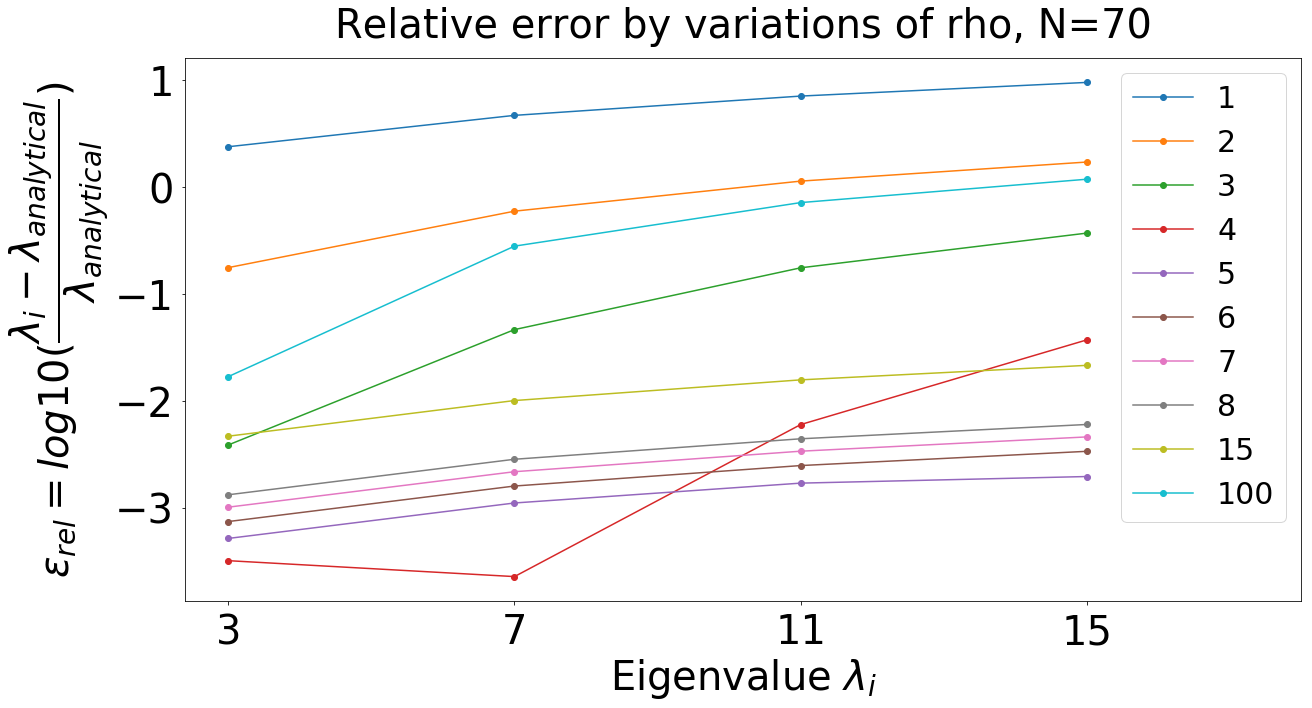

In [20]:
N_70 = Data[Data["N"] == 70]
N_70 = N_70.sort_values(by ='rho' )
plt.figure(figsize = (20,10))


for i in range(len(N_70)):
    s = N_70["lambda"].iloc[i][0:4]
    err = relative_error(s)
    print(err)
    analytical = np.array([3,7,11,15])
    fsize = 40
    plt.plot(analytical,err, '-o', label = N_70["rho"].iloc[i])
    plt.xlabel("Eigenvalue $\lambda_i$", fontsize = fsize)
    plt.ylabel("$\epsilon_{rel} = log10(\dfrac{\lambda_i-\lambda_{analytical}}{\lambda_{analytical}})$", fontsize = fsize)
    plt.title("Relative error by variations of rho, N=70", fontsize = fsize)
    plt.xticks(analytical, fontsize = fsize)
    plt.yticks(fontsize = fsize)
    plt.xlim(xmax = 18)
plt.legend(loc = 'upper right', fontsize = fsize-10)
plt.savefig('N_70_relative_error.png')

[0.37724552 0.67072549 0.85147016 0.97983053]
[-0.75318968 -0.22511823  0.05641626  0.2354308 ]
[-2.39469495 -1.32923744 -0.75251774 -0.42776366]
[-4.52287875 -3.40418896 -2.15377538 -1.40997598]
[-4.19836765 -3.86282681 -3.69897    -4.        ]
[-4.02996322 -3.70208324 -3.50991377 -3.37675071]
[-3.89733766 -3.56634444 -3.37863485 -3.24159281]
[-3.77815125 -3.45064636 -3.26324143 -3.12687324]
[-3.23657201 -2.90507989 -2.71301308 -2.58059504]
[-1.57571743 -1.22965303 -1.01962058 -0.86262479]


/home/oline/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


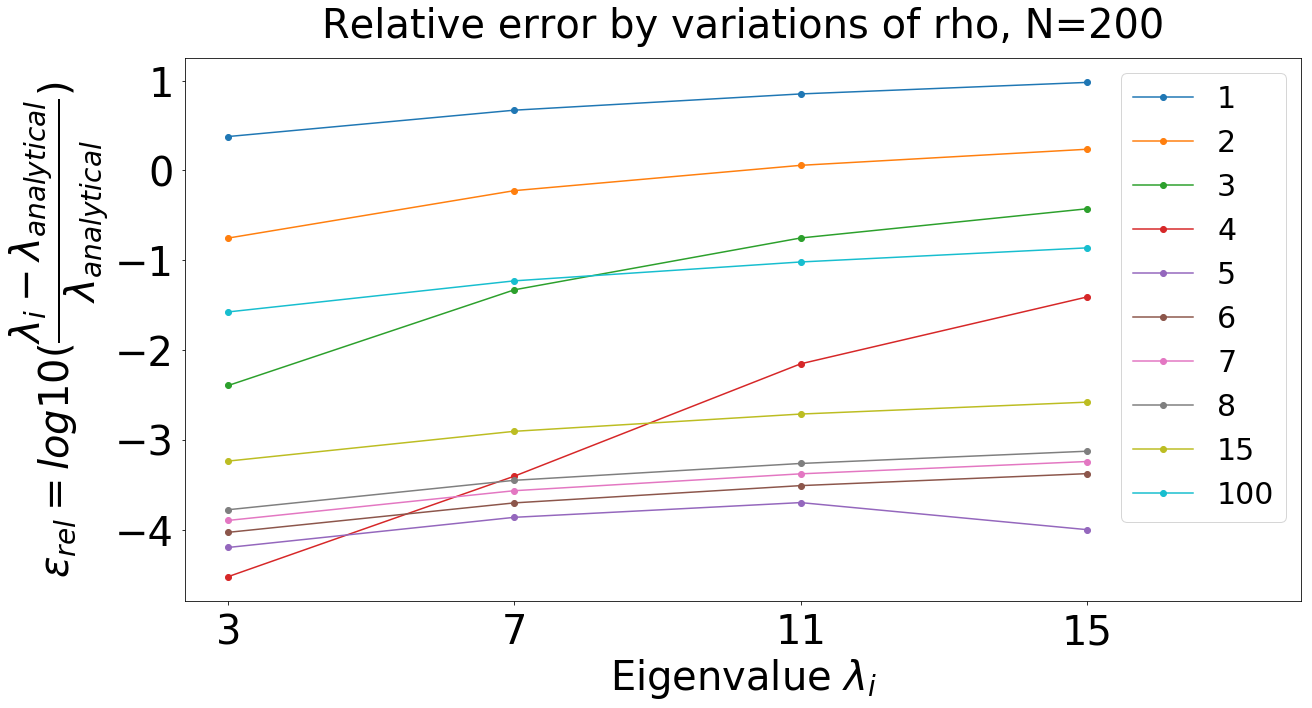

In [21]:
N_200 = Data[Data["N"] == 200]
N_200 = N_200.sort_values(by ='rho' )
plt.figure(figsize = (20,10))


for i in range(len(N_200)):
    s = N_200["lambda"].iloc[i][0:4]
    err = relative_error(s)
    print(err)
    analytical = np.array([3,7,11,15])
    fsize = 40
    plt.plot(analytical,err, '-o', label = N_200["rho"].iloc[i])
    plt.xlabel("Eigenvalue $\lambda_i$", fontsize = fsize)
    plt.ylabel("$\epsilon_{rel} = log10(\dfrac{\lambda_i-\lambda_{analytical}}{\lambda_{analytical}})$", fontsize = fsize)
    plt.title("Relative error by variations of rho, N=200", fontsize = fsize)
    plt.xticks(analytical, fontsize = fsize)
    plt.yticks(fontsize = fsize)
    plt.xlim(xmax = 18)
plt.legend(loc = 'upper right', fontsize = fsize-10)
plt.savefig('N_200_relative_error.png')